# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/dailondolojan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


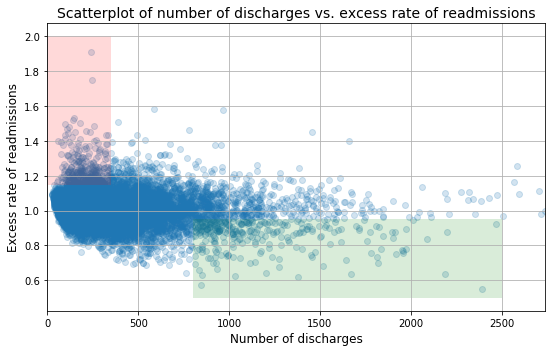

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [7]:
hospital_read_df.shape

(16860, 12)

In [8]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [9]:
hospital_read_df.describe()

,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,7.000000,1.909500,32.800000,29.400000,879.000000


# Exercise A

Do you agree with the above analysis and recommendations? Why or why not?

I do not agree with the above analysis and recommendations because the data provided is insufficient to determine the correlation of excess rate of readmission and number of discharges. The only analysis conducted is a scatterplot where other statistical testing such as hypothesis testing must be conducted to draw futher observations.

# Exercise B.1
Setup an appropriate hypothesis test.

Null: The distribution of excess readmission rate (ERR) is the same for large hospitals (discharges > 100) and small hospitals (discharges <= 100).

Alternative: The distribution of ERR is significantly different for large hospitals and small hospitals.

In [10]:
#New clean dataset:
df = hospital_read_df

# Focus on relavant columns:
df = df[['Number of Discharges', 'Excess Readmission Ratio']]

# Drop rows with missing discharge information:
df = df[df['Number of Discharges'] != 'Not Available']
df['Number of Discharges'] = pd.to_numeric(df['Number of Discharges'])

# Drop nulls:
df.dropna(axis=0, how='any', subset=['Excess Readmission Ratio'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 0 to 13730
Data columns (total 2 columns):
Number of Discharges        11497 non-null int64
Excess Readmission Ratio    11497 non-null float64
dtypes: float64(1), int64(1)
memory usage: 269.5 KB


Large Hospital Excess Readmission Ratio:


count    10274.000000
mean         1.005768
std          0.095046
min          0.549500
25%          0.947725
50%          1.000800
75%          1.059600
max          1.909500
Name: Excess Readmission Ratio, dtype: float64

Small Hospital Excess Readmission Ratio:


count    1223.000000
mean        1.022088
std         0.058154
min         0.893500
25%         0.983800
50%         1.016700
75%         1.052750
max         1.495300
Name: Excess Readmission Ratio, dtype: float64

/Users/dailondolojan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/dailondolojan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


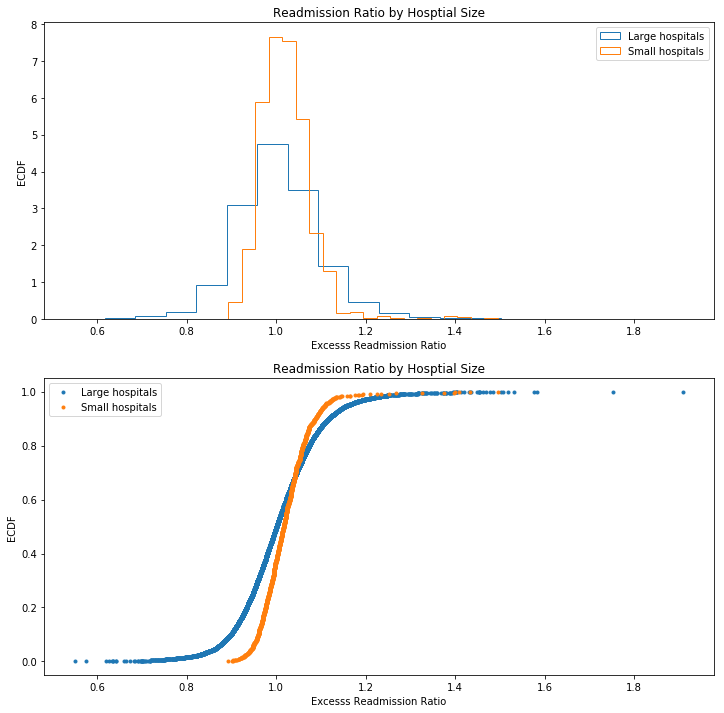

In [12]:
# Separate observations by the size of hospital:
large = df[df['Number of Discharges'] > 100]
small = df[df['Number of Discharges'] <= 100]

# Describe data:
print('Large Hospital Excess Readmission Ratio:')
large['Excess Readmission Ratio'].describe()
print('Small Hospital Excess Readmission Ratio:')
small['Excess Readmission Ratio'].describe()
large_mean = np.mean(large['Excess Readmission Ratio'])
small_mean = np.mean(small['Excess Readmission Ratio'])

# Compute ecdfs:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

x_large, y_large = ecdf(large['Excess Readmission Ratio'])
x_small, y_small = ecdf(small['Excess Readmission Ratio'])

# Examine differences visually
fig = plt.figure(figsize=(12, 12))
_ = plt.subplot(2,1,1)
_ = plt.hist(large['Excess Readmission Ratio'], bins=20, normed=True, histtype='step')
_ = plt.hist(small['Excess Readmission Ratio'], bins=20, normed=True, histtype='step')
_ = plt.xlabel('Excesss Readmission Ratio')
_ = plt.ylabel('ECDF')
_ = plt.title('Readmission Ratio by Hosptial Size')
_ = plt.legend(('Large hospitals', 'Small hospitals'))

_ = plt.subplot(2,1,2)
_ = plt.plot(x_large, y_large, marker='.', linestyle='none')
_ = plt.plot(x_small, y_small, marker='.', linestyle='none')
_ = plt.ylabel('ECDF')
_ = plt.xlabel('Excesss Readmission Ratio')
_ = plt.title('Readmission Ratio by Hosptial Size')
_ = plt.legend(('Large hospitals', 'Small hospitals'))

The graphs above demonstrate how large hospitals have a normal distribution for excess readmission ratio with a mean of 1.006, while smaller hospitals having a higher excess readmission ratio with a mean of 1.022. Even the graphs illustrate how smaller hospitals having a smaller standard deviation for excess readmission ratios than the larger hospitals.

In [15]:
corr_r = df['Number of Discharges'].corr(df['Excess Readmission Ratio'])
print('Correlation Between Number of Discharges and Readmission Ratio:',corr_r,)
print('\nThis is a slight negative correlation which is close to 0.0')

Correlation Between Number of Discharges and Readmission Ratio: -0.09739794351079355

This is a slight negative correlation which is close to 0.0


# Exercise B.2

Compute and report the observed significance value (or p-value).

In [16]:
# Null hypothesis: The distributions of excess readmission rate for large and small hospitals are the same
# Define test statistic: 
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays"""
    return np.mean(data_1) - np.mean(data_2)

# Compute test statistic for observed data:
diff_obs = diff_of_means(large['Excess Readmission Ratio'], small['Excess Readmission Ratio'])

# Draw permutation replicates:
perm_replicates = np.empty(100000)
for i in range(len(perm_replicates)): 
    # Permute the data
    both = np.concatenate((large['Excess Readmission Ratio'], small['Excess Readmission Ratio']))
    both_perm = np.random.permutation(both)
    perm_large = both_perm[:len(large)]
    perm_small = both_perm[len(large):]
    #Draw replicates:
    perm_replicates[i] = diff_of_means(perm_large, perm_small)

# Compute the p-value:
p_value = np.sum(abs(perm_replicates) >= abs(diff_obs)) / len(perm_replicates)

print('observed difference:',diff_obs)
print('p-value:',p_value)

observed difference: -0.01632073298728165
p-value: 0.0


A p-value of 0 is highly significant and means that the observed difference is unlikely due to chance. When calculating 100,000 trials there were none that produced a difference in means as great as the observed (0.016). Therefore, we can reject the null hypothesis and state that there is a statistically significant difference in the excess readmission rate for large and small hospitals.

In [17]:
r = np.corrcoef(df['Number of Discharges'], df['Excess Readmission Ratio'])[0, 1]
print('Pearson correlation coefficient between number of discharges (size of hospital) and the excess readmission ration =', r)

Pearson correlation coefficient between number of discharges (size of hospital) and the excess readmission ration = -0.09739794351079355


# Exercise B.3

Report statistical significance for  α= .01.

A p-value of 0 in 100,000 trials means that the result is statistically significant for  αα  = 0.01.

# Exercise B.4

Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

The data analysis conducted shows a statistically significant difference with a mean excess readmission ratio among large and small hospitals of 0.016, with the smaller hospitals displaying a greater mean excess readmission ratio. "Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions." If an ERR of 1 is assumed to be the desired ratio, the difference in mean ERR for large and small hopitals shows a 1.6% increase over the desired ratio.

It is difficult to assess practical significance from a business standpoint since there are no financial figures to do comparisons. It cannot be assessed whether the cost of reducing a smaller hospital's ERR would financially be worth it. What can be determined is that if given a choice, the patient in general would recieve marginally better care if they went to the larger hospital over a smaller hospital.

# Exercise B.5

Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information? 

The advantages of using the scatter plot above to convey information is it shows a majority of the data rather than just a summary description. It also demonstrates a negative correlation between the excess readmission rate and hospital size.

The disadvantages of using the scatter plot are it doesn't not show the three largest hopitals. Also the shaded areas do not demonstrate the description as well as is should. The red area should be 0 to 100 for discharges and the green area should be 100-7000 for discharges. These boxes would then demonstrate what is discussed in the report.

# Exercise B.6

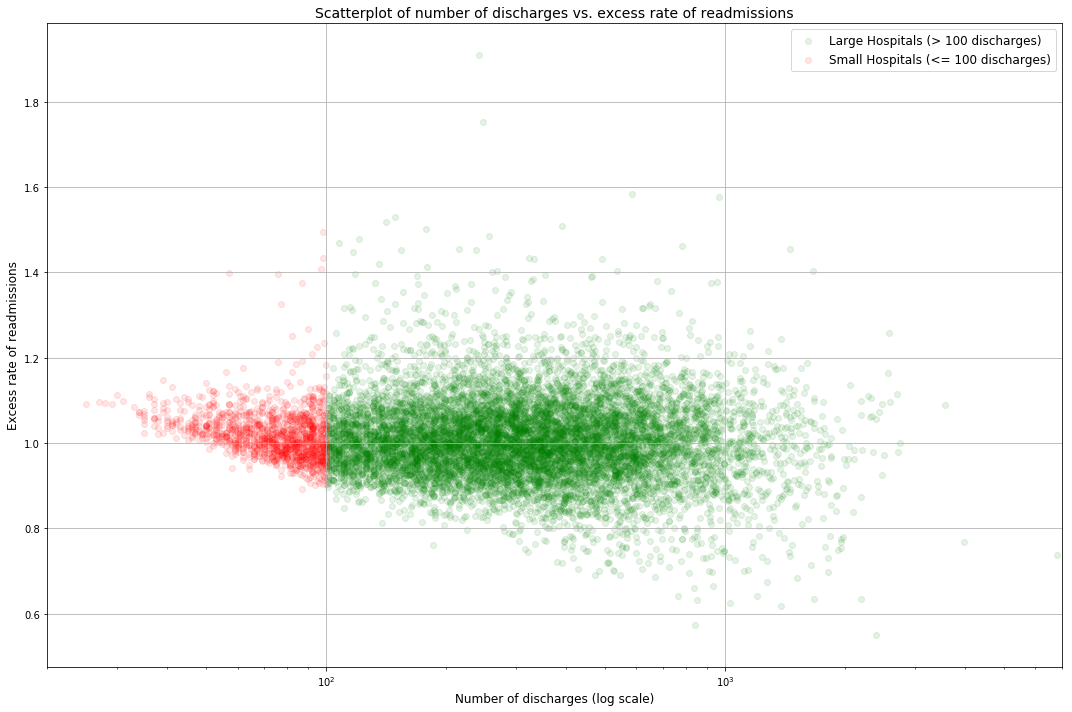

In [18]:
x_large = [a for a in large['Number of Discharges']]
y_large = list(large['Excess Readmission Ratio'])

x_small = [a for a in small['Number of Discharges']]
y_small = list(small['Excess Readmission Ratio'])

fig, ax = plt.subplots(figsize=(15,10))
_ = ax.scatter(x_large, y_large, color='green', alpha=0.1)
_ = ax.scatter(x_small, y_small, color='red', alpha=0.1)


_ = ax.set_xlim([20, 7000])
_ = ax.set_xscale('log')
_ = ax.set_xlabel('Number of discharges (log scale)', fontsize=12)
_ = ax.set_ylabel('Excess rate of readmissions', fontsize=12)
_ = ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
_ = ax.legend(['Large Hospitals (> 100 discharges)', 'Small Hospitals (<= 100 discharges)'], fontsize=12)

ax.grid(True)
fig.tight_layout()